#Aviv Shuster, 316406701

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from datetime import datetime,date

In [ ]:
df = pd.read_csv('Data Science Jobs Salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [ ]:
df['job_title'].unique()

array(['Data Science Consultant', 'Data Scientist',
       'Head of Data Science', 'Head of Data',
       'Machine Learning Engineer', 'Data Analytics Manager',
       'Research Scientist', 'Data Analyst', 'Data Engineer',
       'Data Science Engineer', 'Manager Data Science',
       'Data Engineering Manager', 'AI Scientist',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Data Analytics Engineer', 'Lead Data Analyst', 'BI Data Analyst',
       'Machine Learning Scientist',
       'Machine Learning Infrastructure Engineer',
       'Marketing Data Analyst', 'Lead Data Engineer',
       'Director of Data Engineering',
       'Computer Vision Software Engineer', 'Financial Data Analyst',
       'Cloud Data Engineer', 'Principal Data Analyst',
       'Big Data Architect', 'Lead Data Scientist', 'Data Architect',
       'Big Data Engineer', 'Staff Data Scientist',
       'Data Science Manager', 'Business Data Anal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


<div dir=rtl>

**סקירת מאפייניו של בסיס הנתונים:**

>1. work_year: עמודה אלפא נומרית המציינת את שנת העבודה של אותו עובד אשר אנו רוצים לחזות את שכרו.
2. experience_level: עמודה טקסטואלית-קטגוריאלית המציינת את רמת הניסיון של אותו העובד.<br> כאשר:<br> EN=Junior<br> MI=Intermediate<br> SE=Expert<br> EX=Director
3. employment_type: עמודה טקסטואלית-קטגוריאלית הציינת את סוג ההעסקה של אותו עובד.<br>כאשר: <br>PT=Part-time<br> FT=Full-time<br> CT= Contract<br> FL=Freelance
4. job_title: עמודה טקסטואלית-קטגוריאלית המציינת את המשרה של עובד באותה השנה.
5. salary: עמודה נומרית המציינת את השכר בברוטו של אותו עובד.
6. salary_currency: עמודה טקסטואלית-קטגוריאלית המציינת את המטבע של השכר שמשולם לאותו העובד, לפי קוד מטבע של ארגון התקנים העולמי, ISO 4217.
7. salary_in_usd: עמודה נומרית המציינת את השכר של אותו עובד, באותה השנה, בדולרים.
8. employee_residence: עמודה טקסטואלית-קטגוריאלית המציינת את מקום מגוריו של העובד באותה שנת עבודה, לפי קוד מדינה שנקבעה ע"פ ארגון התקנים העולמי, ISO 3166.
9. remote_ratio: עמודה נומרית קטגוריאלית המציינת את משך הזמן שהעבודה נעשתה במדינה אחרת.<br>כאשר:<br> 0=No remote work(less than 20%)<br> 50=Partially remote<br> 100=Fully remote(more than 80%)
10. company_location: עמודה טקסטואלית-קטגוריאלית המציינת את מיקום המשרדים המרכזיים של החברה בה אותו עובד עבד באותה שנת עבודה, לפי קוד מדינה שנקבעה ע"פ ארגון התקנים העולמי, ISO 3166.
11. company_size: עמודה טקסטואלית-קטגוריאלית המציינת את מס' העובדים הממוצע  בחברה באותה שנת עבודה.<br>כאשר:<br>S=Less than 50 employees(small)<br>M=50 to 250 employees(medium)<br>L=more than 250 employees(Large)

<div dir=rtl>

**בדיקת ערכים חסרים והשלמתן במידת הצורך**<br>
ניכר שאין עמודות עם ערכים חסרים:

In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<div dir=rtl>

**סקירת שיטות קידוד (encoding):**

>1. Label encoding: בגישה זו ישנה המרה של כל ערך בעמודה למספר. ישנו החיסרון בשיטה זו, האומר שהערכים הנומריים יכולים להיות מפוענחים בצורה שגויה ע"י אלגוריתמים, ככאלה שיש להם היררכיה או סדר מסוים. לדוגמא, 
במידה ונבחר לקודד למספר רץ (לדוגמא מ-1 עד 6), הנ"ל יכול ליצור בעייה של יחס/השוואה בין הערכים הנומריים שהקצנו לשדות (בטעות נקצה יותר "משקל" לערכים מסויימים על פני האחרים).
גישה זו דורשת שעמודה זו תהייה קטגוריאלית, לפני שמשתמשים בה לקידוד ול-fit_transform על הדאטה.
2. One-Hot Encoding: בגישה זו כל ערך קטגוריאלי מומר לעמודה חדשה עם הערך 1 או 0 (כלומר true/false). כלומר לפיצ'ר אחד יהיה הערך '1' ולשאר יהיה '0'.
על אף שגישה זו מעלימה את בעיית ההיררכיה והסדר, יש לה את החיסרון של הוספת עמודות נוספות לדאטה סט שלנו. הנ"ל יכול לגרום לגדילה משמעותית מאוד בכמות העמודות בדאטה סט, אם ישנם הרבה ערכים ייחודיים בעמודה הקטגוריאלית הזו.

**מתי נשתמש בכל אחת משיטות אלה:**

>1. Label encoding: נשתמש בגישה זו כאשר הפיצ'ר הקטגוריאלי הוא **היררכי** (כמו ארוחות ביום בוקר-צהריים-ערב או בתי ספר יסודי-חטיבה-תיכון וכ'ו). בנוסף, כאשר מספר הקטגוריות בעמודה הינו גדול, כי השיטה One-Hot Encoding תגדיל במקרה זה את הדאטה סט בצורה מאוד משמעותית וזה ישליך על צריכת זיכרון גבוהה.
2. One-Hot Encoding: נשתמש בגישה זו כאשר הפיצ'ר הקטגוריאלי הוא **לא היררכי** (כמו למשל מדינות שונות בעולם או סוגי מכוניות שונים ועוד).
בנוסף, כאשר מספר הקטגוריות בעמודה הינו קטן, כך שגישה זו תמומש ללא פגיעה בצריכת הזיכרון ובגדילה משמעותית של הדאטה סט.

<div dir=rtl>

לפני שאתחיל, **הערה לבודק**: בכדי להמנע מיצירת שני דאטה פריימים חדשים עבור כל שיטת קידוד, ומהעובדה שישנם שדות אשר צריכים לעבור קידוד ספציפי ולא את השני (משיקולי "משקל" או היררכיה או כמות ערכים יוניקית שתשפיע על צריכת זיכרון ועוד), אצור דאטה פריים אחד שיכיל עמודות המקודדות, כל אחת ע"פ הקידוד המתאים לה.
כמובן שאסביר בהרחבה את השיקולים בבחירת שיטת הקידוד המתאימה תוך פירוט היתרונות והחסרונות.

### Data analysis + Feature Engineering

<div dir=rtl>

ראשית, לפני תחילת ה preproccessing, אשנה את ערכי העמודות המיוצגים כקיצורים (או ראשי תיבות) לצורה נוחה יותר לעבודה עמם (כלומר אבצע mapping שלהם לטקסט מלא וברור יותר):

In [ ]:
# Experience level
df['experience_level'] = df['experience_level'].map({"EN":"Junior", "MI":"Intermediate", "SE":"Expert", "EX":"Director"})

In [ ]:
# Employment type
df['employment_type'] = df['employment_type'].map({"PT":"Part-time", "FT":"Full-time", "CT":"Contract", "FL":"Freelance"})

In [ ]:
# Remote ratio
df['remote_ratio'] = df['remote_ratio'].map({0:"Onsite", 50:"Hybrid", 100:"Remote"}) # לצורכי EDA

In [ ]:
# Company size
df['company_size'] = df['company_size'].map({"S":"Small", "M":"Medium", "L":"Large"})

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,Junior,Full-time,Data Science Consultant,54000,EUR,64369,DE,Hybrid,DE,Large
1,2020,Expert,Full-time,Data Scientist,60000,EUR,68428,GR,Remote,US,Large
2,2021e,Director,Full-time,Head of Data Science,85000,USD,85000,RU,Onsite,RU,Medium
3,2021e,Director,Full-time,Head of Data,230000,USD,230000,RU,Hybrid,RU,Large
4,2021e,Junior,Full-time,Machine Learning Engineer,125000,USD,125000,US,Remote,US,Small


<div dir=rtl>

כעת אבחן את המאפיינים השונים ואטפל בכל אחד בהתאם:

<div dir=rtl>

עמודת ה- **Salary** הינה עמודה נומרית שהמודל ידע להתמודד איתה, על כן אשאיר אותה כמו שהיא.<br>עמודת ה- **salaray_currency** מייצגת את סוג המטבע שעמודת ה salary מיוצגת על פיו.<br> בשל העובדה שקיימת עמודה נוספת, **salary_in_usd**, נומרית, אשר מייצגת את השכר השנתי של עובד, ניכר כי אין צורך בשתי העמודות האחרונות (salary and salary_currency) מפני שהן מייצגות את אותו השכר ואת סוג המטבע, בשתי עמודות שונות שמהוות יתירות ואינן נחוצות.<br> על כן, אמחק את העמודות salary and salary_currency מהדאטה פריים ואשאיר את הפיצ'ר salary_in_usd. 

In [ ]:
df.drop(["salary_currency", "salary"], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,Junior,Full-time,Data Science Consultant,64369,DE,Hybrid,DE,Large
1,2020,Expert,Full-time,Data Scientist,68428,GR,Remote,US,Large
2,2021e,Director,Full-time,Head of Data Science,85000,RU,Onsite,RU,Medium
3,2021e,Director,Full-time,Head of Data,230000,RU,Hybrid,RU,Large
4,2021e,Junior,Full-time,Machine Learning Engineer,125000,US,Remote,US,Small


<div dir=rtl>

בהמשך מחקר זה, אציג את הקשרים השונים בין הפיצ'ר salary_in_usd לשאר הפיצ'רים,  מפני שהנ"ל מהווה מטרה מרכזית במחקר על חיזוי משכורות של משרות Data Science.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x432 with 0 Axes>

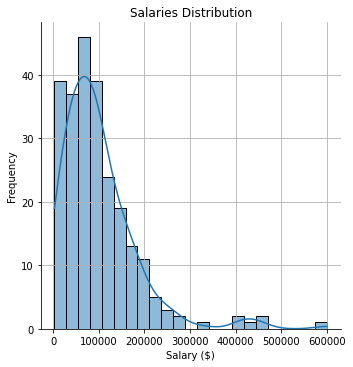

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.displot(x = df["salary_in_usd"],data=df,kde=True)
fig.set(xlabel='Salary ($)',ylabel='Frequency',title='Salaries Distribution')
plt.grid(True)
plt.show




<div dir=rtl>

מהתבוננות על התפלגות השכר הכללית, ניכר כי ברוב המשרות בשוק, השכר המשולם נע בין 0 ל- 300K כאשר ישנן משרות בודדות בהן מרוויחים בין 300k ל- 600K.

<div dir=rtl>

המאפיין **work_year** הינו שדה אלפא נומרי בו יש לטפל כך שערכיו לא יכילו אותיות או רווחים מיותרים.

In [ ]:
df['work_year']

0      2021e
1       2020
2      2021e
3      2021e
4      2021e
       ...  
240     2020
241    2021e
242     2020
243     2020
244    2021e
Name: work_year, Length: 245, dtype: object

In [ ]:
df['work_year'].unique()

array(['2021e', '2020'], dtype=object)

In [ ]:
df['work_year'] = df['work_year'].apply(lambda val: str(val).replace(' ',''))
df['work_year'] = df['work_year'].apply(lambda val: str(val).replace('e',''))
df['work_year'] = df['work_year'].apply(lambda val: int(val))

In [ ]:
df['work_year'].unique()

array([2021, 2020])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    int64 
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary_in_usd       245 non-null    int64 
 5   employee_residence  245 non-null    object
 6   remote_ratio        245 non-null    object
 7   company_location    245 non-null    object
 8   company_size        245 non-null    object
dtypes: int64(2), object(7)
memory usage: 17.4+ KB


<div dir=rtl>

כעת אציג את ההתפלגות של work_year :

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Work Year'),
 Text(0.5, 1.0, 'Work Year Distribution')]

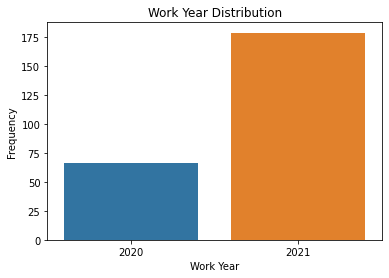

In [ ]:
ax = sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Work Year', ylabel='Frequency', title ='Work Year Distribution')

<div dir=rtl>

ניכר כי הדאטה סט הנ"ל מכיל בעיקר רשומות של שכר בשנת 2021.

<div dir=rtl>

המאפיין **experience_level** הינו שדה קטגוריאלי-טקסטואלי אותו יש לקודד ע"פ שיטת **Label encoding** בשל העובדה שהינו פיצ'ר קטגוריאלי היררכי ויש חשיבות למשקל של כל ערך.

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Experience Level'),
 Text(0.5, 1.0, 'Experience Level Distribution')]

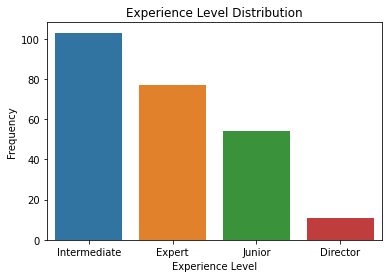

In [ ]:
ax = sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Experience Level', ylabel='Frequency', title ='Experience Level Distribution')

רמת הניסיון בדאטה סט זה מתפלג כך שישנו רוב של משרות Intermediate, לאחר מכן מומחים, לאחר מכן כאלה עם ניסיון התחלתי ומעט יחסית משרות של מנהלים בכירים.

<div dir=rtl>

בנוסף, ניתן להציג את הקשר בין הרמות השונות של הניסיון במקצוע לשכר שהעובד מרוויח: 

Text(0.5, 1.0, 'Salaries per Experience level Distribution')

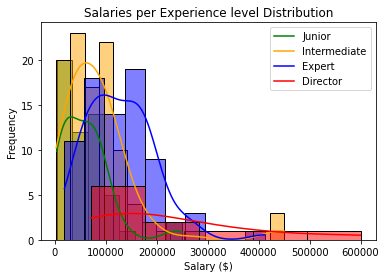

In [ ]:
fig = sns.histplot(df.query("experience_level == 'Junior'")["salary_in_usd"], kde = True, color = "green")
fig = sns.histplot(df.query("experience_level == 'Intermediate'")["salary_in_usd"], kde = True, color = "orange")
fig = sns.histplot(df.query("experience_level == 'Expert'")["salary_in_usd"], kde = True, color = "blue")
fig = sns.histplot(df.query("experience_level == 'Director'")["salary_in_usd"], kde = True, color = "red")
fig.legend(labels = ["Junior", "Intermediate", "Expert", "Director"])
fig.set_xlabel("Salary ($)")
fig.set_ylabel("Frequency")
fig.set_title("Salaries per Experience level Distribution")

<div dir=rtl>

ניכר כי רוב המשכרות בשוק, נעות בין 0 ל- 200K דולרים.<br>עובדים עם ניסיון של סניורים או מנהלים בכירים, יכולים לקבל גם יותר (קרוב ל 600K).<br> כאשר, ישנם outlayers בדמות מספר קטן של עובדי Intermediate שמרוויחים קצת יותר מ 400K.

<div dir=rtl>

בנוסף, ניתן לראות אם ישנה מגמה של שינוי, בשנים 2020-2021, בכל הנוגע לכמות העובדים בעלי ניסיון מסוים ביחס לאחר: 

Text(0.5, 1.0, 'Work Year per Experience level')

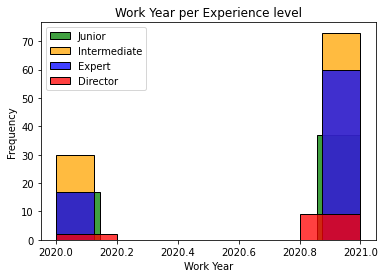

In [ ]:
fig = sns.histplot(df.query("experience_level == 'Junior'")["work_year"], color = "green")
fig = sns.histplot(df.query("experience_level == 'Intermediate'")["work_year"], color = "orange")
fig = sns.histplot(df.query("experience_level == 'Expert'")["work_year"], color = "blue")
fig = sns.histplot(df.query("experience_level == 'Director'")["work_year"], color = "red")
fig.legend(labels = ["Junior", "Intermediate", "Expert", "Director"])
fig.set_xlabel("Work Year")
fig.set_ylabel("Frequency")
fig.set_title("Work Year per Experience level")

<div dir=rtl>

ניכר ששוק ה- Data Science גדל בכמות העובדים עבור כל רמות הניסיון, ב- 2021 (לפחות ע"פ הנתונים בדאטה סט זה).

<div dir=rtl>

כעת אקודד את הפיצ'ר experience_level:

In [ ]:
df["experience_level"] = df["experience_level"].map({"Junior":1, "Intermediate":2, "Expert":3, "Director":4})

In [ ]:
df['experience_level'].unique()

array([1, 3, 4, 2])

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,1,Full-time,Data Science Consultant,64369,DE,Hybrid,DE,Large
1,2020,3,Full-time,Data Scientist,68428,GR,Remote,US,Large
2,2021,4,Full-time,Head of Data Science,85000,RU,Onsite,RU,Medium
3,2021,4,Full-time,Head of Data,230000,RU,Hybrid,RU,Large
4,2021,1,Full-time,Machine Learning Engineer,125000,US,Remote,US,Small


<div dir=rtl>

המאפיין **employment_type** הינו שדה קטגוריאלי-טקסטואלי היררכי, אותו אקודד ע"פ שיטת **Label encoding**.

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Employment Type'),
 Text(0.5, 1.0, 'Employment Type Distribution')]

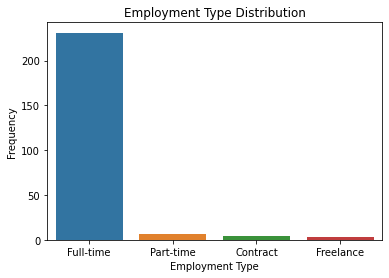

In [ ]:
ax = sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Employment Type', ylabel='Frequency', title ='Employment Type Distribution')

<div dir=rtl>

ניכר שרוב המשרות בדאטה סט זה הינן של עובדים במשרה מלאה (בפער).

<div dir=rtl>

בנוסף, ניתן להציג את הקשר בין סוגי ההעסקה השונים לשכר שהעובד מרוויח: 

Text(0.5, 1.0, 'Salaries per Employment type Distribution')

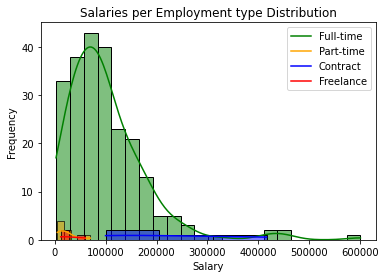

In [ ]:
fig = sns.histplot(df.query("employment_type == 'Full-time'")["salary_in_usd"], kde = True, color = "green")
fig = sns.histplot(df.query("employment_type == 'Part-time'")["salary_in_usd"], kde = True, color = "orange")
fig = sns.histplot(df.query("employment_type == 'Contract'")["salary_in_usd"], kde = True, color = "blue")
fig = sns.histplot(df.query("employment_type == 'Freelance'")["salary_in_usd"], kde = True, color = "red")
fig.legend(labels = ["Full-time", "Part-time", "Contract", "Freelance"])
fig.set_xlabel("Salary")
fig.set_ylabel("Frequency")
fig.set_title("Salaries per Employment type Distribution")

<div dir=rtl>

ניכר כי רוב העובדים, עובדים במשרה מלאה ומרוויחים בין 0 ל 300K דולרים. ישנם חריגים שמרוויחים קצת יותר מ- 400K ואף בודדים שמגיעים לשכר של 600K.<br>עובדים במשרה חלקית מרוויחים בין 0 לכ- 75K דולרים.<br>עובדים במשרה של חוזה אישי מרוויחים בין 100K לכ- 400K דולרים.<br>עובדים במשרת עצמאי, מרוויחים עד 60K דולרים.

<div dir=rtl>

כעת אקודד את הפיצ'ר employment_type:

In [ ]:
df["employment_type"] = df["employment_type"].map({"Freelance":1, "Contract":2, "Part-time":3, "Full-time":4}) #Label encoding

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,1,4,Data Science Consultant,64369,DE,Hybrid,DE,Large
1,2020,3,4,Data Scientist,68428,GR,Remote,US,Large
2,2021,4,4,Head of Data Science,85000,RU,Onsite,RU,Medium
3,2021,4,4,Head of Data,230000,RU,Hybrid,RU,Large
4,2021,1,4,Machine Learning Engineer,125000,US,Remote,US,Small


<div dir=rtl>

המאפיין **job_title** הינו שדה קטגוריאלי-טקסטואלי לא היררכי, אותו אקודד ע"פ שיטת **One-Hot encoding**.

[Text(0, 0.5, 'Job Title'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Top 15 of the most popular jobs (in 2020-2021)')]

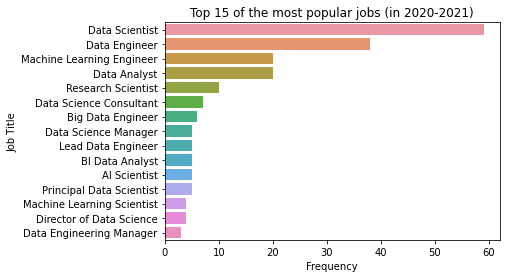

In [ ]:
ax = sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(15), y = df["job_title"].value_counts().sort_values(ascending = False).head(15).index)
ax.set(xlabel='Frequency', ylabel='Job Title', title ='Top 15 of the most popular jobs (in 2020-2021)')

<div dir=rtl>

בנוסף, ניתן להציג את הקשר בין שמות המשרות השונים לשכר שהעובד מרוויח: 

Text(0.5, 1.0, 'Top 15 most paid jobs per Average Salaries')

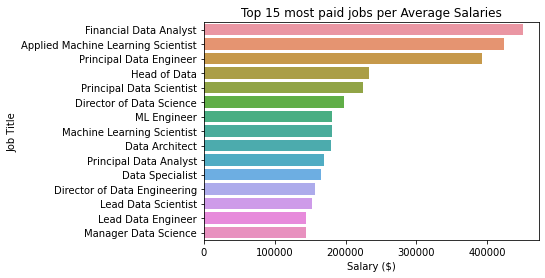

In [ ]:
fig = sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).head(15),y = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).head(15).index)
fig.set_xlabel("Salary ($)")
fig.set_ylabel("Job Title")
fig.set_title("Top 15 most paid jobs per Average Salaries")

<div dir=rtl>

ניכר כי שלושת המשרות המובילות (מבחינת השכר המשולם) בשוק זה הינן: Financial Data Analyst, Applied Machine Learning Scientist, Principal Data Enginner אשר מרוויחים יותר מ- 400K דולרים לשנה.

In [ ]:
df["job_title"].value_counts().sum()

245

In [ ]:
df["job_title"].value_counts()

Data Scientist                              59
Data Engineer                               38
Machine Learning Engineer                   20
Data Analyst                                20
Research Scientist                          10
Data Science Consultant                      7
Big Data Engineer                            6
Data Science Manager                         5
Lead Data Engineer                           5
BI Data Analyst                              5
AI Scientist                                 5
Principal Data Scientist                     5
Director of Data Science                     4
Machine Learning Scientist                   4
Data Engineering Manager                     3
Business Data Analyst                        3
ML Engineer                                  3
Data Analytics Engineer                      3
Lead Data Analyst                            3
Data Analytics Manager                       3
Computer Vision Engineer                     3
Computer Visi

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
job_title_list = df['job_title'].unique().tolist()
job_title_list = [word for word in job_title_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['job_title']]).toarray())
df_temp.rename(columns=lambda i: job_title_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Data Science Consultant,...,Staff Data Scientist,Data Science Manager,Business Data Analyst,Principal Data Scientist,Computer Vision Engineer,Product Data Analyst,Principal Data Engineer,Finance Data Analyst,Applied Machine Learning Scientist,Data Specialist
0,2021,1,4,Data Science Consultant,64369,DE,Hybrid,DE,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,Data Scientist,68428,GR,Remote,US,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,4,4,Head of Data Science,85000,RU,Onsite,RU,Medium,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,Head of Data,230000,RU,Hybrid,RU,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,Machine Learning Engineer,125000,US,Remote,US,Small,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir=rtl>

המאפיין **employee_residence** הינו שדה קטגוריאלי-טקסטואלי לא היררכי, אותו אקודד ע"פ שיטת **One-Hot encoding**.

In [ ]:
df['employee_residence'].unique()

array(['DE', 'GR', 'RU', 'US', 'FR', 'AT', 'CA', 'UA', 'NG', 'PK', 'IN',
       'GB', 'ES', 'IT', 'PL', 'BG', 'PH', 'PT', 'HU', 'SG', 'BR', 'MX',
       'TR', 'NL', 'AE', 'JP', 'JE', 'PR', 'RS', 'KE', 'CO', 'NZ', 'VN',
       'IR', 'RO', 'CL', 'BE', 'DK', 'CN', 'HK', 'SI', 'MD', 'LU', 'HR',
       'MT'], dtype=object)

In [ ]:
df['employee_residence'].nunique()

45

[Text(0, 0.5, 'Employee residence'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Employee residence Distribution')]

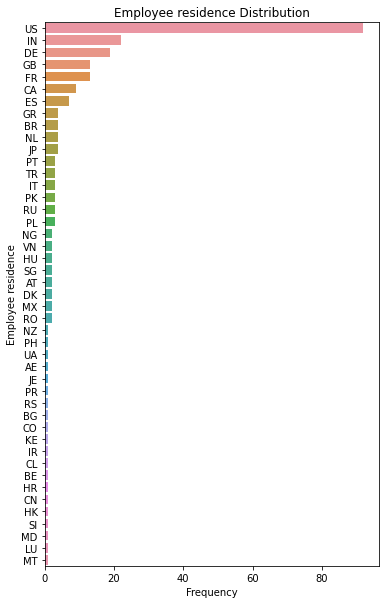

In [ ]:
plt.figure(figsize=(6,10))
ax = sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(45), y = df["employee_residence"].value_counts().sort_values(ascending = False).head(45).index)
ax.set(xlabel='Frequency', ylabel='Employee residence', title ='Employee residence Distribution')

<div dir=rtl>:

ניכר כי רוב העובדים בדאטה סט זה, מתגוררים בארה"ב (US), הודו (IN), גרמניה (DE) ואנגליה (GB).

<div dir=rtl>

בנוסף, ניתן להציג את הקשר בין מדינת מגוריו של העובד לבין השכר הממוצע שהעובד מרוויח: 

Text(0.5, 1.0, "Top 15 highest salaries(in avg) per employee's residence")

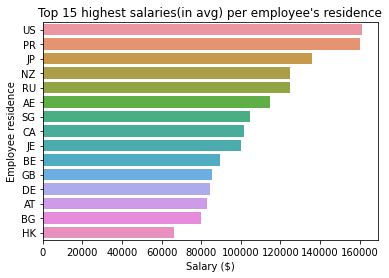

In [ ]:
fig = sns.barplot(x = df.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending = False).head(15),y = df.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending = False).head(15).index)
fig.set_xlabel("Salary ($)")
fig.set_ylabel("Employee residence")
fig.set_title("Top 15 highest salaries(in avg) per employee's residence")

<div dir=rtl>:

ניכר כי העובדים המתגוררים בארה"ב (US), פורטו ריקו (PR), יפן (JP) וניו זילנד (NZ), הינם המשתכרים בשכר הגבוה ביותר בממוצע, בעולם ה- DS (כמובן על פי דאטה סט זה).

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')  #One-Hot encoding
employee_residence_list = df['employee_residence'].unique().tolist()
employee_residence_list = [word for word in employee_residence_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['employee_residence']]).toarray())
df_temp.rename(columns=lambda i: employee_residence_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Data Science Consultant,...,CL,BE,DK,CN,HK,SI,MD,LU,HR,MT
0,2021,1,4,Data Science Consultant,64369,DE,Hybrid,DE,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,Data Scientist,68428,GR,Remote,US,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,4,4,Head of Data Science,85000,RU,Onsite,RU,Medium,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,Head of Data,230000,RU,Hybrid,RU,Large,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,Machine Learning Engineer,125000,US,Remote,US,Small,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **remote_ratio** הינו שדה קטגוריאלי-טקסטואלי היררכי, אותו אקודד ע"פ שיטת **Label encoding**.

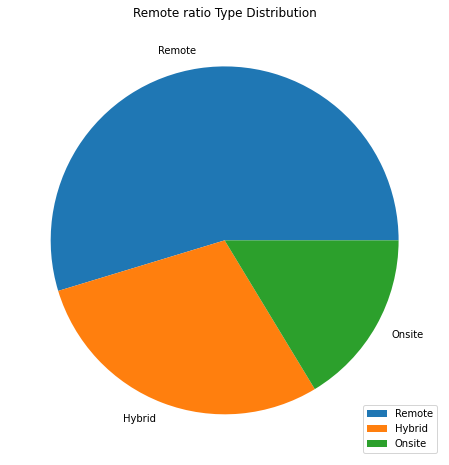

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df["remote_ratio"].value_counts(sort=True), labels = ['Remote', 'Hybrid', 'Onsite'])
plt.legend()
plt.title('Remote ratio Type Distribution')
plt.show()

Text(0.5, 1.0, 'Salaries per Remote Ratio Distribution')

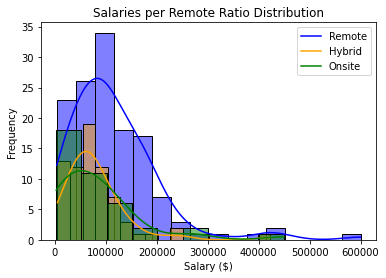

In [ ]:
fig = sns.histplot(df.query("remote_ratio == 'Remote'")["salary_in_usd"], kde = True, color = "blue")
fig = sns.histplot(df.query("remote_ratio == 'Hybrid'")["salary_in_usd"], kde = True, color = "orange")
fig = sns.histplot(df.query("remote_ratio == 'Onsite'")["salary_in_usd"], kde = True, color = "green")
fig.legend(labels = ["Remote", "Hybrid", "Onsite"])
fig.set_xlabel("Salary ($)")
fig.set_ylabel("Frequency")
fig.set_title("Salaries per Remote Ratio Distribution")

<div dir=rtl>

ניתן ללמוד מגרף זה, שהתפלגות העובדים שעובדים בעבודה מרחוק, מתפרשת על טווח שכר רחב יותר (חלקם מרוויחים משמעותית יותר!) מאשר אלה שעובדים בצורה היברידית או במקום העבודה הפיזי שלהם.<br>כמו כן, לא ניכר הבדל משמעותי בין אלה שעובדים בצורה היברידית לבין אלה שעובדים במקום העבודה הפיזי שלהם.

In [ ]:
df["remote_ratio"] = df["remote_ratio"].map({'Onsite':1, 'Hybrid':2, 'Remote':3}) #Label encoding

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Data Science Consultant,...,CL,BE,DK,CN,HK,SI,MD,LU,HR,MT
0,2021,1,4,Data Science Consultant,64369,DE,2,DE,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,Data Scientist,68428,GR,3,US,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,4,4,Head of Data Science,85000,RU,1,RU,Medium,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,Head of Data,230000,RU,2,RU,Large,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,Machine Learning Engineer,125000,US,3,US,Small,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div dir=rtl>:

המאפיין **company_location** הינו שדה קטגוריאלי-טקסטואלי לא היררכי, אותו אקודד ע"פ One-Hot encoding.

In [ ]:
df['company_location'].unique()

array(['DE', 'US', 'RU', 'FR', 'AT', 'CA', 'UA', 'NG', 'IN', 'ES', 'PL',
       'GB', 'PT', 'DK', 'SG', 'MX', 'TR', 'NL', 'AE', 'JP', 'CN', 'HU',
       'KE', 'CO', 'NZ', 'IR', 'CL', 'PK', 'BE', 'GR', 'SI', 'BR', 'CH',
       'IT', 'MD', 'LU', 'VN', 'AS', 'HR', 'IL', 'MT'], dtype=object)

In [ ]:
df['employee_residence'].nunique()

45

[Text(0, 0.5, 'Company location'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Company location Distribution')]

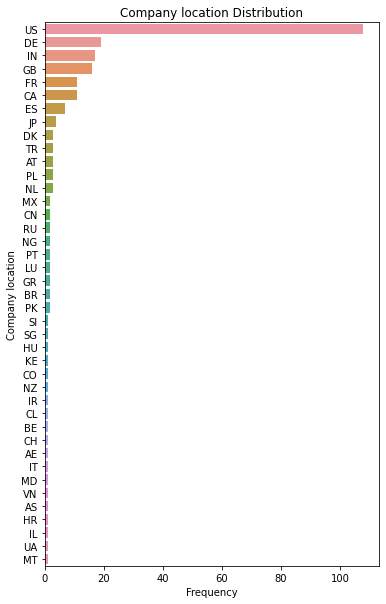

In [ ]:
plt.figure(figsize=(6,10))
ax = sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(45), y = df["company_location"].value_counts().sort_values(ascending = False).head(45).index)
ax.set(xlabel='Frequency', ylabel='Company location', title ='Company location Distribution')

<div dir=rtl>:

ניכר כי מקום מושבן של החברות בהן רוב העובדים בדאטה סט זה, עובדים, הינן ארה"ב (US), גרמניה (DE), הודו (IN) ואנגליה (GB).

<div dir=rtl>

כעת אמצא את מיקומי החברות עם מספר העובדים הגבוה ביותר שגם גר באותה המדינה וגם עובד בה: 

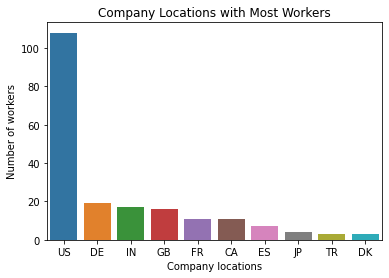

In [ ]:
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.xlabel("Company locations")
plt.ylabel("Number of workers")
plt.title("Company Locations with Most Workers");

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
company_location_list = df['company_location'].unique().tolist()
company_location_list = ['company_' + word for word in company_location_list]
df_temp = pd.DataFrame(ohe.fit_transform(df[['company_location']]).toarray())
df_temp.rename(columns=lambda i: company_location_list[i], inplace = True)
df = df.join(df_temp)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Data Science Consultant,...,company_BR,company_CH,company_IT,company_MD,company_LU,company_VN,company_AS,company_HR,company_IL,company_MT
0,2021,1,4,Data Science Consultant,64369,DE,2,DE,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,Data Scientist,68428,GR,3,US,Large,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021,4,4,Head of Data Science,85000,RU,1,RU,Medium,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,Head of Data,230000,RU,2,RU,Large,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,Machine Learning Engineer,125000,US,3,US,Small,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div dir=rtl>

המאפיין **company_size** הינו שדה קטגוריאלי-טקסטואלי היררכי, אותו אקודד ע"פ שיטת **Label encoding**.

In [ ]:
df['company_size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Company size'),
 Text(0.5, 1.0, 'Company size Distribution')]

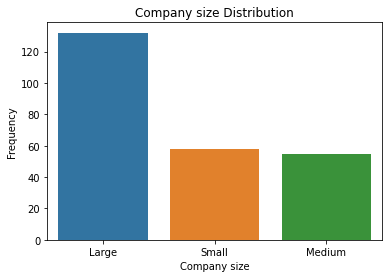

In [ ]:
ax = sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False))
ax.set(xlabel='Company size', ylabel='Frequency', title ='Company size Distribution')

Text(0.5, 1.0, 'Salaries per Company size Distribution')

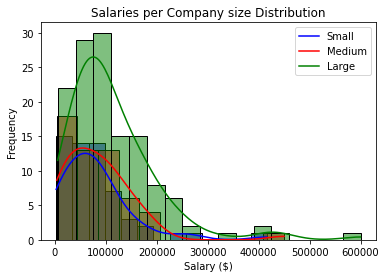

In [ ]:
fig = sns.histplot(df.query("company_size == 'Small'")["salary_in_usd"], kde = True, color = "blue")
fig = sns.histplot(df.query("company_size == 'Medium'")["salary_in_usd"], kde = True, color = "red")
fig = sns.histplot(df.query("company_size == 'Large'")["salary_in_usd"], kde = True, color = "green")
fig.legend(labels = ["Small", "Medium", "Large"])
fig.set_xlabel("Salary ($)")
fig.set_ylabel("Frequency")
fig.set_title("Salaries per Company size Distribution")

<div dir=rtl>

ניכר כי טווח המשכורות המשולמות בחברה גדולה, רחב יותר מטווח המשכורות המשולמות בחברות בגודל בינוני קטן (בהן משלמים בערך את אותו טווח המשכורות).
<br>כמו כן, גרף זה מציג בצורה יפה, את ההבדלים בשכר המשולם בחברה גדולה ביחס לחברות קטנות יותר.

<div dir=rtl>

ניתן להציג את הקשר בין גודל החברה למשכורות המשולמות בה, גם בצורה של striplot, המלמדת על המשכורות החריגות ועל טווחי משכורות המוגדרים כנורמה בחברה בסדר גודל מסוים:

Text(0.5, 1.0, 'Salary by Company Size')

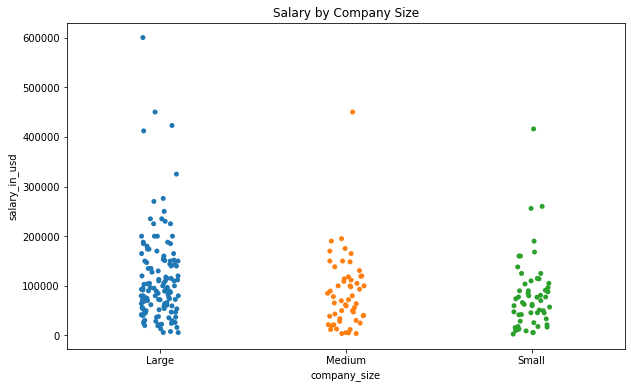

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df['company_size'], y=df['salary_in_usd'], data=df).set_title('Salary by Company Size')

In [ ]:
df["company_size"] = df["company_size"].map({"Small":1, "Medium":2, "Large":3}) # Label encoding

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Data Science Consultant,...,company_BR,company_CH,company_IT,company_MD,company_LU,company_VN,company_AS,company_HR,company_IL,company_MT
0,2021,1,4,Data Science Consultant,64369,DE,2,DE,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,Data Scientist,68428,GR,3,US,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021,4,4,Head of Data Science,85000,RU,1,RU,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,Head of Data,230000,RU,2,RU,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,Machine Learning Engineer,125000,US,3,US,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###Correlation Matrix 
<div dir=rtl>

**הערה לבודק**: בשל העובדה שכמות הפיצ'רים, לאחר הקידודים שנעשו, הינה גבוהה, יווצר מצב שמטריצת הקורלציה מאוד גדולה ולא רואים את הערכים בכל משבצת. לכן אבצע Label encoding לעמודות job title ,company location  ו- employee residence למרות שהקידוד הנכון להם הוא One-Hot כמו שעשיתי בדאטה פריים המקורי.<br> 
כעת, אבחן את **הקורלציות** בין הפיצ'רים השונים:

In [ ]:
corr_matrix_df = df[['work_year','experience_level','employment_type','employee_residence','job_title','salary_in_usd','company_location','company_size','remote_ratio']].copy()

In [ ]:
le = LabelEncoder()
corr_matrix_df['job_title'] = le.fit_transform(corr_matrix_df['job_title'])
corr_matrix_df['company_location'] = le.fit_transform(corr_matrix_df['company_location'])
corr_matrix_df['employee_residence'] = le.fit_transform(corr_matrix_df['employee_residence'])

In [ ]:
corr_matrix_df.head()

,work_year,experience_level,employment_type,employee_residence,job_title,salary_in_usd,company_location,company_size,remote_ratio
0,2021,1,4,9,17,64369,10,3,2
1,2020,3,4,14,20,68428,39,3,3
2,2021,4,4,38,27,85000,34,2,1
3,2021,4,4,38,26,230000,34,3,2
4,2021,1,4,43,32,125000,39,1,3


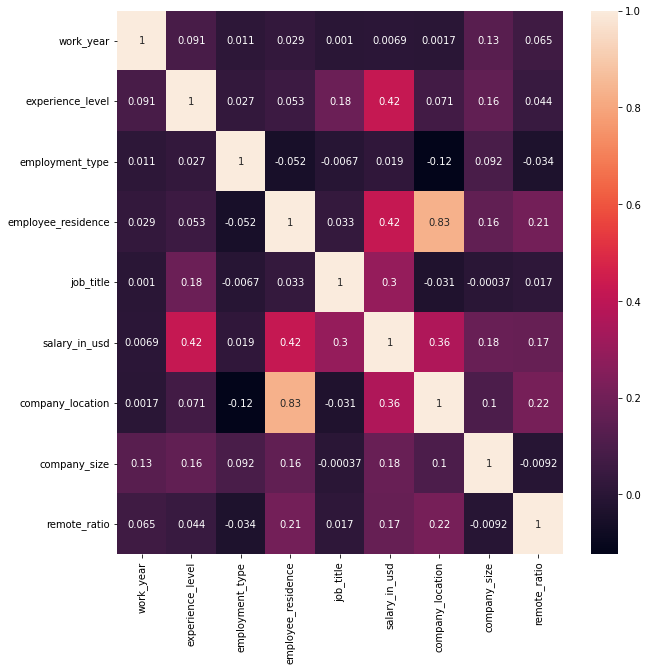

In [ ]:
corrMatrix = corr_matrix_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

<div dir=rtl>

מה- heatmap אשר מוצגת לפנינו, ניתן ללמוד על הקורלציה (ההתאמה) בין הפיצ'רים  הנומריים השונים בהם טיפלתי עד כה והשכר עצמו.<br>המאפיינים הנחזים להיות הקשורים ביותר לדירוג האפליקציה (שהקורלצייה ביניהם לבין הlabel- salary_in_usd, הינה גבוהה בהרבה ביחס לפיצ'רים אחרים):
<br>
<div dir=ltr>

Experience Level, Company location, Employee residence and Job Title.
<br>
<div dir=rtl>

ניכר כי הפיצ'רים הבאים אינם קורלטיבים לעמודת השכר:
<br> Employment Type, Work Year, Company Size and Remote ratios עלולים להיות פחות רלוונטיים בשל הקורלצייה הנמוכה שלהן עם עמודת הדירוג (הנ"ל לא אומר שהן לא רלוונטיות כלל).



### Preparing and Splitting the data for the models
<div dir=rtl>

כעת אייבא את הספריות של sklearn עבור המודלים של Classification Tree, Random Forest and XGBoost:

In [ ]:
df.drop(['job_title','employee_residence','company_location'],axis=1,inplace=True)

In [ ]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,Data Science Consultant,Data Scientist,Head of Data Science,Head of Data,...,company_BR,company_CH,company_IT,company_MD,company_LU,company_VN,company_AS,company_HR,company_IL,company_MT
0,2021,1,4,64369,2,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,68428,3,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021,4,4,85000,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,230000,2,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,125000,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Columns: 135 entries, work_year to company_MT
dtypes: float64(129), int64(6)
memory usage: 258.5 KB


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(labels=['salary_in_usd'], axis = 1)
y = df['salary_in_usd']

<div dir=rtl>
כעת אפצל את הדאטה סט לשלושה חלקים (train, validation & test) ל 70-15-15:

In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (171, 134)
x_val: (37, 134)
x_test: (37, 134)
y_train: (171,)
y_val: (37,)
y_test: (37,)


In [ ]:
x.head()

,work_year,experience_level,employment_type,remote_ratio,company_size,Data Science Consultant,Data Scientist,Head of Data Science,Head of Data,Machine Learning Engineer,...,company_BR,company_CH,company_IT,company_MD,company_LU,company_VN,company_AS,company_HR,company_IL,company_MT
0,2021,1,4,2,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,4,3,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021,4,4,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,4,4,2,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,4,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div dir=rtl>

**הערה חשובה**: בחרתי לכמת את טיב כל מודל לפי מטריקה של **השגיאה הריבועית הממוצעת** מפני שמדובר על בעיית רגרסיה כך שלדיוק (accuracy) יהיה משמעות אחרת ולא מתאימה לסוג בעיה זה.

### Decision Tree Regressor
<div dir=rtl>


In [ ]:
tree_reg = DecisionTreeRegressor()

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,13],
           "min_samples_leaf":[1,3,5,7,9,11,13],
           "min_weight_fraction_leaf":[0.1,0.3,0.5,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV # for tuning Hyper-Parameters to the ideal ones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
tuning_model = GridSearchCV(tree_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(x_train,y_train) 

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=13, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-8127233217.744 total time=   0.0s
[CV 3/3] END max_depth=13, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-5345570804.685 total time=   0.0s
[CV 1/3] END max_depth=13, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-4110227201.794 total time=   0.0s
[CV 2/3] END max_depth=13, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-12130556671.174 total time=   0.0s
[CV 3/3] END max_depth=13, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-7560666707.300 total time=   0.0s
[CV 1/3] END max_depth=13, max_features=auto, max_leaf_nodes=None, min_sam

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
14112 fits failed out of a total of 35280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14112 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fracti

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 30, 50, 70, 90],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters for the Decision Tree Regressor
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 90,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [ ]:
tuned_hyper_model = DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=90,min_samples_leaf=3,min_weight_fraction_leaf=0.1,splitter='random')

In [ ]:
tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=90,
                      min_samples_leaf=3, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [ ]:
val_pred=tuned_hyper_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_pred))+' $')

Mean Absolute Error = 30757.146401946917 $


In [ ]:
pred=tuned_hyper_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,pred))+' $')

Mean Absolute Error = 34513.456256162965 $


### Random Forest Regressor
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (171, 134)
x_val: (37, 134)
x_test: (37, 134)
y_train: (171,)
y_val: (37,)
y_test: (37,)


In [ ]:
rand_forest_reg = RandomForestRegressor()

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={"bootstrap":[True, False],
            "n_estimators" : [200, 600, 1000, 1400, 1800],
            "max_depth" : [10, 30, 50, 70, 100, None],
           "min_samples_leaf":[1, 2, 4],
            "min_samples_split": [2, 5, 10],
           "max_features":["auto","sqrt"] }

In [ ]:
forest_tuning_model = GridSearchCV(rand_forest_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
forest_tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-2469622007.285 total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-7289212889.364 total time=   0.4s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4851615689.168 total time=   0.4s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-2713272463.375 total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-7319424778.965 total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 30, 50, 70, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 600, 1000, 1400, 1800]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters for the Random Forest Regressor
forest_tuning_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
tuned_hyper_model = RandomForestRegressor(bootstrap=True,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=200)

In [ ]:
tuned_hyper_model.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=5,
                      n_estimators=200)

In [ ]:
val_pred=tuned_hyper_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_pred))+' $')

Mean Absolute Error = 37468.55020785183 $


In [ ]:
pred=tuned_hyper_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,pred))+' $')

Mean Absolute Error = 34220.31023981612 $


### XGBoost Regressor
<div dir=rtl>


In [ ]:
# split to train, val and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state = 1)

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')
print(f'y_test: {y_test.shape}')

x_train: (171, 134)
x_val: (37, 134)
x_test: (37, 134)
y_train: (171,)
y_val: (37,)
y_test: (37,)


In [ ]:
XGB = XGBRegressor()

<div dir=rtl>

כעת אשתמש ב- GridSearchCV על מנת למצוא את ה- Hyper Parameters האידיאלים לקבלת ביצועי מודל מיטביים.

In [ ]:
parameters={'n_estimators': [100, 300, 500, 700, 900, 1100, 1300,1500],
            'max_depth': [2, 3, 5, 7, 10, 12, 15],
            'learning_rate': [0.05, 0.1, 0.15, 0.20],
            'min_child_weight': [1, 2, 3, 4, 5]}

In [ ]:
xgb_tuning_model = GridSearchCV(XGB,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
xgb_tuning_model.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV 3/3] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1300;, score=-5351392512.567 total time=   0.5s
[13:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1500;, score=-3957184602.469 total time=   0.6s
[13:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1500;, score=-7017012953.657 total time=   0.5s
[13:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1500;, score=-5355117664.646 total time=   0.5s
[13:50:56] WARNING: /workspace/src/objective/regression_obj.cu:1

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [2, 3, 5, 7, 10, 12, 15],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 300, 500, 700, 900, 1100, 1300,
                                          1500]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters for the XGB Regressor
xgb_tuning_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100}

In [ ]:
xgb_tuning_model = XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.2,min_child_weight=1)

In [ ]:
xgb_tuning_model.fit(x_train,y_train)

[15:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2)

In [ ]:
val_pred=xgb_tuning_model.predict(x_val)
# Predicting the Validation set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_val,val_pred))+' $')

Mean Absolute Error = 31946.34765625 $


In [ ]:
pred=xgb_tuning_model.predict(x_test)
# Predicting the Test set results
print('Mean Absolute Error = '+str(mean_absolute_error(y_test,pred))+' $')

Mean Absolute Error = 39033.84140097129 $


### Summary
<div dir=rtl>

לאחר עבודה על הדאטה הטבלאי - המרה של ערכים אלפא-נומריים לנומריים, קידוד ע"פ שתי שיטות הקידוד שלמדנו (Label Encoding and One-Hot Encoding) וחיתוך בין פיצ'רים שונים על מנת לקבל הבנה חדשה, כל אלה הביאו להכנה טובה של המידע ושל הפיצ'רים, על מנת לקבל ביצועים טובים בשלושת המודלים הנ"ל.<br>לבסוף, בעזרת tuning ומציאת ה- HyperParameters האידיאלים,  המודל שחוזה את שכר העובד באותה שנת עבודה, בצורה הטובה ביותר הינו Random Forest Regressor.<br>הנ"ל בעל השגיאה הממוצעת המוחלטת הקטנה ביותר : 34220.31 $